In [1]:
import pandas as pd 
data=pd.read_csv('IMDB Dataset.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
print("Checking Missing Values:")
print(data.isnull().sum())

Checking Missing Values:
review       0
sentiment    0
dtype: int64


In [9]:
data.shape

(50000, 2)

In [11]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

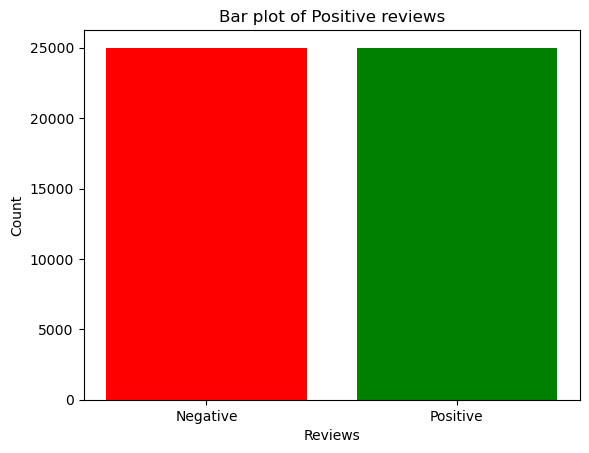

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns

sentiment_counts = data['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'green'])
plt.title("Bar plot of Positive reviews")
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.xlabel("Reviews")
plt.ylabel("Count")
plt.show()

In [15]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text= text.lower()
    text= re.sub(r'\W', ' ',text)
    text= re.sub(r'\s+', ' ', text)
    text= ' '.join(word for word in text.split() if word not in stop_words)
    tokens = word_tokenize(text)  
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens) # Convert tokenized text back to string (required for TF-IDF)
    
data['cleaned_review'] = data['review'].apply(preprocess)
data.head(10)

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching 1 oz episode h...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...
5,"Probably my all-time favorite movie, a story o...",positive,probably time favorite movie story selflessnes...
6,I sure would like to see a resurrection of a u...,positive,sure would like see resurrection dated seahunt...
7,"This show was an amazing, fresh & innovative i...",negative,show amazing fresh innovative idea 70 first ai...
8,Encouraged by the positive comments about this...,negative,encouraged positive comment film looking forwa...
9,If you like original gut wrenching laughter yo...,positive,like original gut wrenching laughter like movi...


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  
X_tfidf = vectorizer.fit_transform(data['cleaned_review'])
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

print("TF-IDF Feature Matrix Shape:", X_tfidf.shape)

TF-IDF Feature Matrix Shape: (50000, 5000)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['sentiment'], test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape) 

(40000, 5000) (10000, 5000)


In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Accuracy: 0.8881
Precision: 0.8785
Recall: 0.9028
F1-score: 0.8905


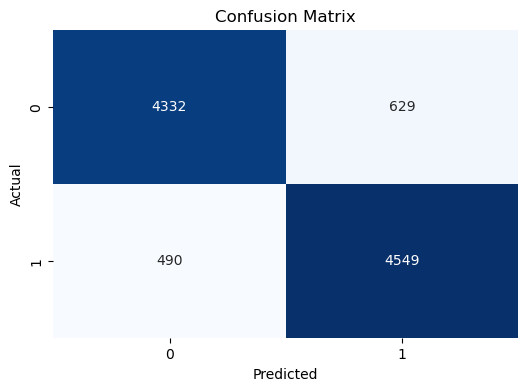

In [37]:
from sklearn.metrics import confusion_matrix

conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()